# 로지스틱 회귀 - 분류

### 1. Sigmoid 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x, a=1, b=0):
    return (1. / (1 + np.exp(-a * (x - b))))

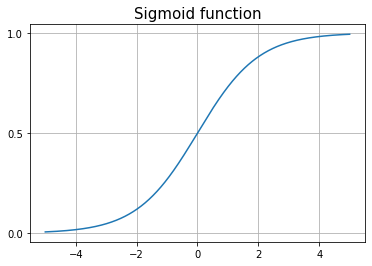

In [3]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys)
plt.title('Sigmoid function', fontsize=15)
plt.yticks([0, 0.5, 1])
plt.grid()
plt.show()

In [4]:
for x in [-5, -2, 2, 5]:
    print(f'sigmoid({x}): {sigmoid(x):.4f}')

sigmoid(-5): 0.0067
sigmoid(-2): 0.1192
sigmoid(2): 0.8808
sigmoid(5): 0.9933


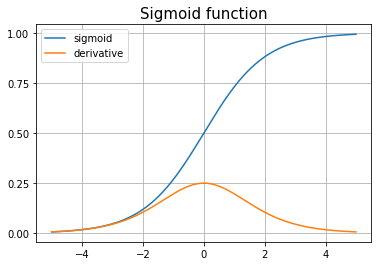

In [6]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative')
plt.title('Sigmoid function', fontsize=15)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.legend()
plt.grid()
plt.show()

- a 값의 변화에 따른 시그모이드 함수

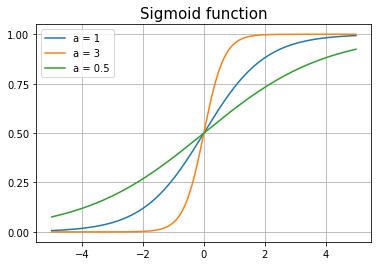

In [8]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label='a = 1')
plt.plot(xs, y3, label='a = 3')
plt.plot(xs, y_half, label='a = 0.5')
plt.title('Sigmoid function', fontsize=15)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.legend()
plt.grid()
plt.show()

- b 값의 변화에 따른 시그모이드 함수

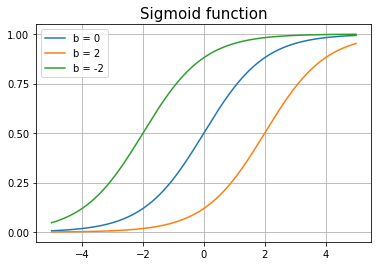

In [10]:
y_plus2 = sigmoid(xs, b=2)
y_minus2 = sigmoid(xs, b=-2)
plt.plot(xs, ys, label='b = 0')
plt.plot(xs, y_plus2, label='b = 2')
plt.plot(xs, y_minus2, label='b = -2')
plt.title('Sigmoid function', fontsize=15)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.legend()
plt.grid()
plt.show()

### 2. 이진 분류

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

- 로지스틱 회귀를 하려면 X 데이터를 스케일링을 해주어야 함

In [12]:
# 스케일링을 하지 않은 경우
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [13]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2022)

In [14]:
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2022,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
# 스케일링을 하지 않은 경우 max_iter 값을 키우면 해결이 되는 경우가 있음
lrc = LogisticRegression(max_iter=1000, random_state=2022)
lrc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, random_state=2022)

In [16]:
# 스케일링
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [17]:
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [18]:
lrc.score(X_test, y_test)

0.9912280701754386

- 학습을 마친 후 제공해주는 정보

In [19]:
lrc.coef_

array([[-0.25707259, -0.47053468, -0.26515518, -0.3535659 , -0.11973861,
         0.56573207, -0.85426573, -0.82789531,  0.13441632,  0.07846871,
        -1.26329143,  0.29832367, -0.76599244, -0.99137113, -0.30182972,
         1.05456564,  0.08762138, -0.39327008,  0.51932729,  0.5181576 ,
        -0.99890038, -1.13382048, -0.85983726, -0.97362808, -0.6192331 ,
         0.25215457, -0.82557496, -1.11106798, -0.96614897, -0.44679764]])

In [20]:
lrc.intercept_

array([0.07150263])

- X_test[0] 의 예측값

In [21]:
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([-20.3489795])

In [22]:
sigmoid(val[0])

1.4539534023004044e-09

In [27]:
pred = 1 if sigmoid(val[0]) > 0.5 else 0
pred

0

In [24]:
# 실제값
y_test[0]

0

- X_test[:5]

In [25]:
lrc.predict(X_test[:5])

array([0, 1, 0, 1, 0])

In [26]:
lrc.predict_proba(X_test[:5])

array([[9.99999999e-01, 1.45395340e-09],
       [1.29048390e-02, 9.87095161e-01],
       [9.99988662e-01, 1.13377133e-05],
       [5.23798806e-03, 9.94762012e-01],
       [9.99999953e-01, 4.74465654e-08]])

### 3. 다중 분류

In [28]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2, random_state=2022
)

In [35]:
wine.data.shape

(178, 13)

In [31]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([47, 57, 38]))

In [32]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [33]:
lrc2.predict(X_test[:5])

array([2, 0, 0, 0, 1])

- lrc2 가 제공해주는 정보

In [34]:
lrc2.coef_

array([[ 7.55425328e-01,  2.54696045e-01,  4.48868634e-01,
        -8.27794253e-01,  4.43111539e-02,  2.17556029e-01,
         6.47072052e-01, -1.73818031e-01,  1.37444479e-01,
         1.56334022e-01,  1.23537988e-01,  6.75862331e-01,
         1.03739137e+00],
       [-9.31115735e-01, -4.90126341e-01, -8.24554580e-01,
         5.85648798e-01, -9.34024069e-02, -9.82919053e-03,
         3.38293620e-01,  1.74347892e-01,  2.49046242e-01,
        -9.81806450e-01,  6.67121854e-01,  5.15389011e-02,
        -1.11517327e+00],
       [ 1.75690407e-01,  2.35430296e-01,  3.75685946e-01,
         2.42145455e-01,  4.90912530e-02, -2.07726839e-01,
        -9.85365672e-01, -5.29861108e-04, -3.86490722e-01,
         8.25472428e-01, -7.90659841e-01, -7.27401232e-01,
         7.77818948e-02]])

In [36]:
lrc2.coef_.shape

(3, 13)

In [37]:
lrc2.intercept_

array([ 0.39626385,  0.66992355, -1.0661874 ])

In [38]:
val2 = np.dot(lrc2.coef_, X_test[0]) + lrc2.intercept_
val2

array([-2.45825701, -0.3795118 ,  2.83776881])

In [39]:
# sigmoid 함수를 적용하면 ==> 다중 분류에는 적용할 수 없음
sigmoid(val2)

array([0.07883682, 0.40624465, 0.94468298])

In [40]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [41]:
softmax(val2)

array([0.00479532, 0.03833586, 0.95686882])

In [42]:
# 다중 분류에서 predict_proba 값은 softmax를 한 결과
lrc2.predict_proba(X_test[0].reshape(1,-1))

array([[0.00479532, 0.03833586, 0.95686882]])

In [43]:
# 각각의 확률값을 모두 더하면 1이 됨
np.sum(softmax(val2))

0.9999999999999999

In [44]:
# 다중 분류에서 예측값은 np.argmax와 같이 가장 큰 확률의 인덱스 값
np.argmax(softmax(val2))

2